In [14]:
from spatialdata import SpatialData
import numpy as np
sdata = SpatialData.read(r"C:\Users\P70078823\Desktop\MSIConverter\peadfgf.zarr")

# List available tables
print("Available tables:", list(sdata.tables.keys()))

# List available images
print("Available images:", list(sdata.images.keys()))

# List available shapes
print("Available shapes:", list(sdata.shapes.keys()))


version mismatch: detected: RasterFormatV02, requested: FormatV04


Available tables: ['msi_dataset']
Available images: ['msi_dataset_tic']
Available shapes: ['msi_dataset_pixels']


TIC image keys: ['msi_dataset_tic']


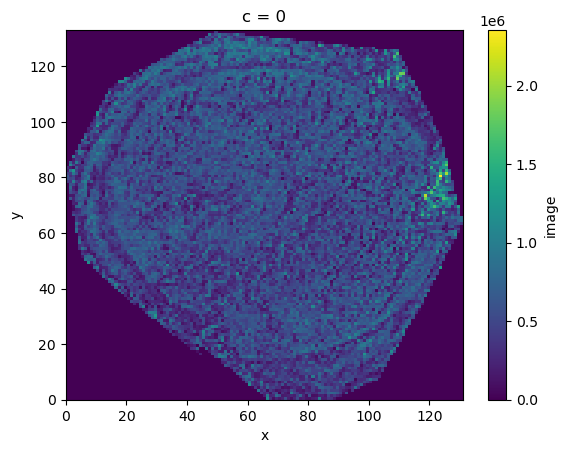

In [15]:
import matplotlib.pyplot as plt


# Get all image keys containing "tic"
tic_keys = [key for key in sdata.images.keys() if "tic" in key.lower()]
print("TIC image keys:", tic_keys)

# Get the TIC image (assuming single dataset)
tic_key = tic_keys[0]  # e.g., "msi_dataset_tic"
tic_image = sdata.images[tic_key]
# Select the first channel (c=0) and plot
tic_image.sel(c=0).plot.imshow(cmap='viridis')
plt.show()

# Display the plot
plt.show()

Average spectrum keys: []


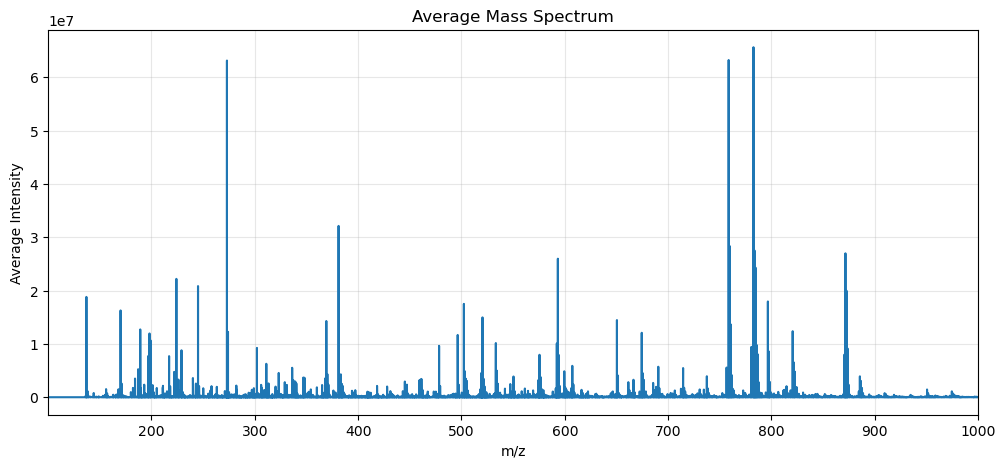

In [16]:
# Get all table keys containing "average"
avg_keys = [key for key in sdata.tables.keys() if "average" in key.lower()]
print("Average spectrum keys:", avg_keys)

# Get the main MSI data table (assuming a single dataset)
main_table_key = list(sdata.tables.keys())[0]
msi_table = sdata.tables[main_table_key]

# Access the average spectrum from the .uns attribute
if "average_spectrum" in msi_table.uns:
    intensities = msi_table.uns["average_spectrum"]
else:
    raise KeyError("Average spectrum not found in table.uns")

# Get m/z values from the table's var DataFrame
mz_values = msi_table.var["mz"].values if "mz" in msi_table.var else msi_table.var_names.to_numpy()

import matplotlib.pyplot as plt
# import plotly.express as px

# # Plot the average mass spectrum
# fig = px.line(x=mz_values, y=intensities, labels={'x': 'm/z', 'y': 'Intensity'}, title='Average Mass Spectrum')
# fig.update_layout(xaxis_title='m/z', yaxis_title='Intensity')
# fig.show()
# print(mz_values.shape)

plt.figure(figsize=(12, 5))
plt.plot(mz_values, intensities)
plt.xlabel('m/z')
plt.ylabel('Average Intensity')
plt.title('Average Mass Spectrum')
plt.xlim(min(mz_values), max(mz_values))
plt.grid(True, alpha=0.3)
plt.show()